In [69]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime

In [70]:
df = pd.read_csv('C:\jupyter_notebook_file\교량_기준_임시_최종db.csv')
df

,Unnamed: 0,Unnamed: 0.1,bridge_name,address,etc_address,latitude,longitude,brid_height_origin,location_start,wl_station_code,rf_station_code,obs_date,WL,rainfall,bridge_height
0,0,0,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 12:00:00,3.0,0.0,510.0
1,1,1,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 13:00:00,6.0,0.0,510.0
2,2,2,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 14:00:00,10.0,0.0,510.0
3,3,3,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 15:00:00,14.0,0.0,510.0
4,4,4,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 16:00:00,18.0,0.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097827,4097827,4381107,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 17:00:00,184.0,0.0,483.0
4097828,4097828,4381108,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 18:00:00,184.0,0.0,483.0
4097829,4097829,4381109,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 19:00:00,185.0,0.0,483.0
4097830,4097830,4381110,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 20:00:00,185.0,0.0,483.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097832 entries, 0 to 4097831
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Unnamed: 0.1        int64  
 2   bridge_name         object 
 3   address             object 
 4   etc_address         object 
 5   latitude            float64
 6   longitude           float64
 7   brid_height_origin  float64
 8   location_start      object 
 9   wl_station_code     int64  
 10  rf_station_code     int64  
 11  obs_date            object 
 12  WL                  float64
 13  rainfall            float64
 14  bridge_height       float64
dtypes: float64(6), int64(4), object(5)
memory usage: 469.0+ MB


In [72]:
df['obs_date'] = pd.to_datetime(df['obs_date'])

In [73]:
bridge_list = pd.unique(df['location_start']).tolist() # 교량 리스트
len(bridge_list)

54

In [89]:
# 54개 모든 교량에 대한 df_list
df_list = [df[df['location_start']==i] for i in bridge_list]

for i in range(len(df_list)): 
    # obs_date, WL 컬럼 이외 삭제
    df_list[i] = df_list[i].drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'bridge_name', 'address', 'etc_address', 'latitude', 'longitude',
                                          'location_start', 'wl_station_code', 'rf_station_code', 'rainfall', 'brid_height_origin', 'bridge_height'])
    # date 정렬
    df_list[i].sort_values(['obs_date'], inplace=True)
    df_list[i].reset_index(drop=True, inplace=True)
    df_list[i].rename({'obs_date':'time', 'WL':'value'}, axis=1, inplace=True)

In [90]:
df_list[0]

,time,value
0,2010-02-25 12:00:00,3.0
1,2010-02-25 13:00:00,6.0
2,2010-02-25 14:00:00,10.0
3,2010-02-25 15:00:00,14.0
4,2010-02-25 16:00:00,18.0
...,...,...
84484,2020-08-26 21:00:00,12.0
84485,2020-08-26 22:00:00,12.0
84486,2020-08-26 23:00:00,16.0
84487,2020-08-27 00:00:00,17.0


<AxesSubplot:>

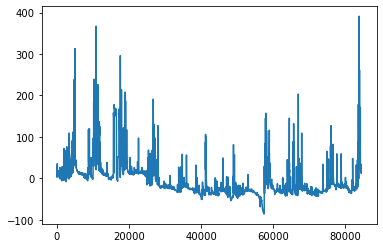

In [91]:
df_list[0]['value'].plot() # 첫 번째 교량 하천 수위 그래프

In [92]:
split_date = []
for i in range(len(df_list)):
    # 각 데이터프레임마다 test data의 비율이 0.4가 되도록 설정
    idx = len(train_test_split(df_list[i], test_size=.4)[0])
    split_date.append(df_list[i]['time'][idx])

In [87]:
split_date

[Timestamp('2016-09-13 21:00:00'),
 Timestamp('2016-09-13 21:00:00'),
 Timestamp('2016-09-13 21:00:00'),
 Timestamp('2016-09-13 21:00:00'),
 Timestamp('2019-02-18 20:00:00'),
 Timestamp('2019-06-08 10:00:00'),
 Timestamp('2016-05-14 18:00:00'),
 Timestamp('2016-08-22 07:00:00'),
 Timestamp('2016-06-06 21:00:00'),
 Timestamp('2016-08-10 01:00:00'),
 Timestamp('2016-12-01 12:00:00'),
 Timestamp('2016-06-01 17:00:00'),
 Timestamp('2017-12-27 04:00:00'),
 Timestamp('2019-02-18 20:00:00'),
 Timestamp('2016-05-24 00:00:00'),
 Timestamp('2020-01-25 01:00:00'),
 Timestamp('2017-12-27 01:00:00'),
 Timestamp('2016-05-24 20:00:00'),
 Timestamp('2016-10-30 11:00:00'),
 Timestamp('2016-05-23 16:00:00'),
 Timestamp('2016-12-02 20:00:00'),
 Timestamp('2016-08-21 09:00:00'),
 Timestamp('2016-05-24 00:00:00'),
 Timestamp('2016-09-07 12:00:00'),
 Timestamp('2017-03-04 17:00:00'),
 Timestamp('2016-07-17 13:00:00'),
 Timestamp('2014-09-20 03:00:00'),
 Timestamp('2016-07-18 19:00:00'),
 Timestamp('2016-07-

In [93]:
## X의 train, test용 데이터: 스플릿 기준으로 나누기
train_list = [df_list[i][df_list[i]['time'] < split_date[i]]['value'] for i in range(len(df_list))]
test_list = [df_list[i][df_list[i]['time'] >= split_date[i]]['value'] for i in range(len(df_list))]

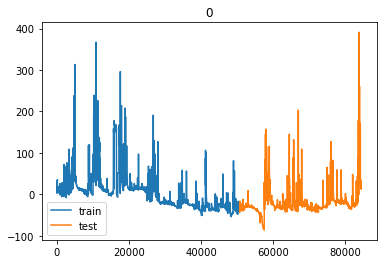

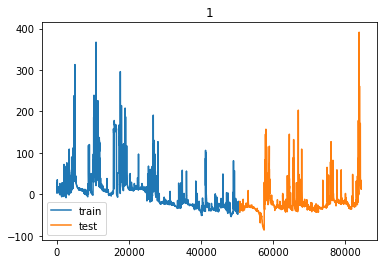

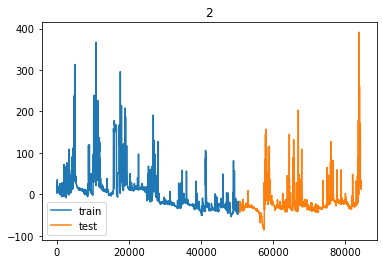

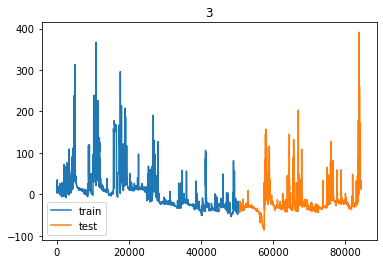

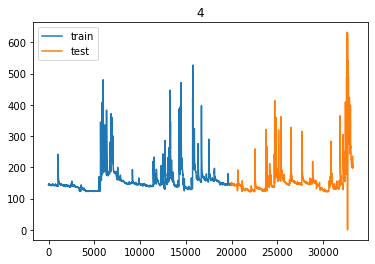

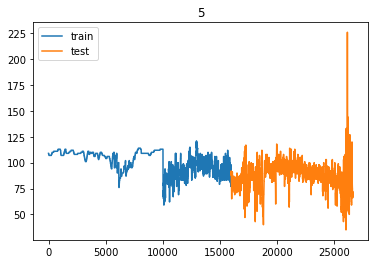

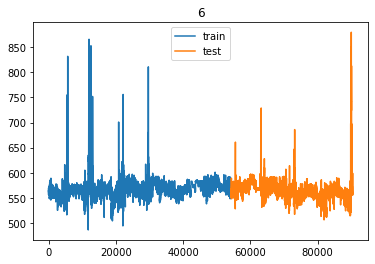

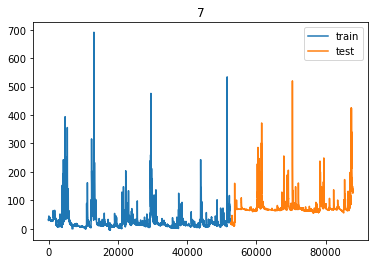

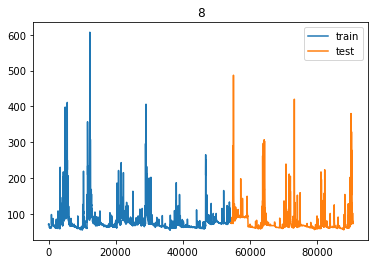

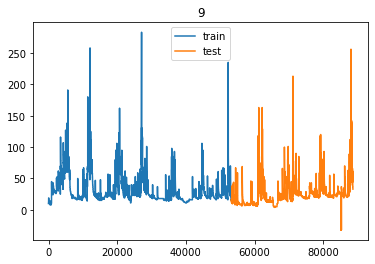

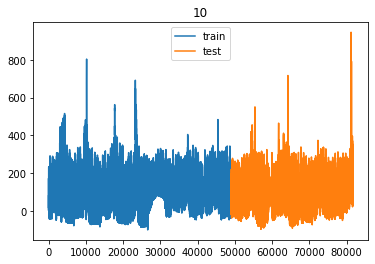

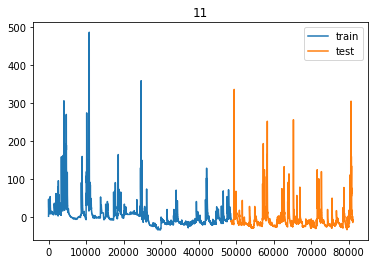

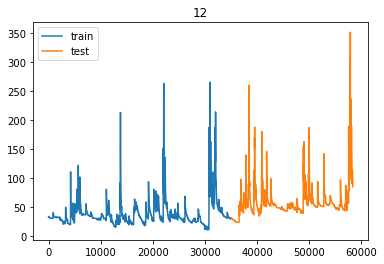

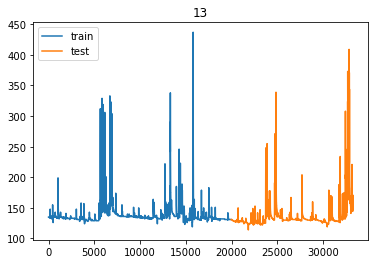

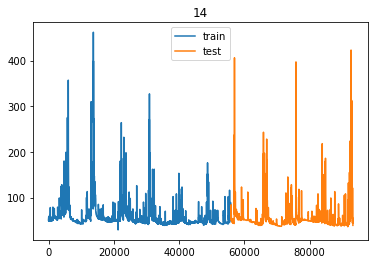

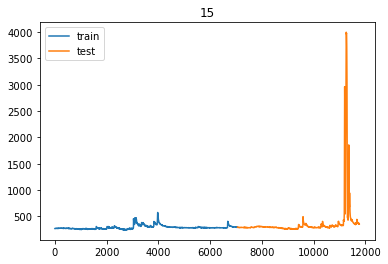

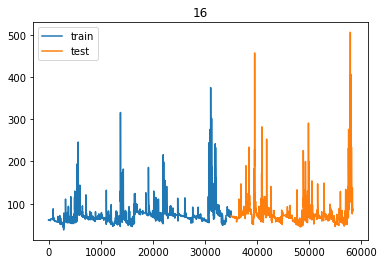

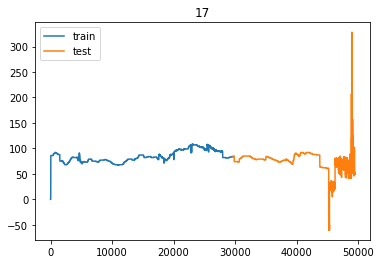

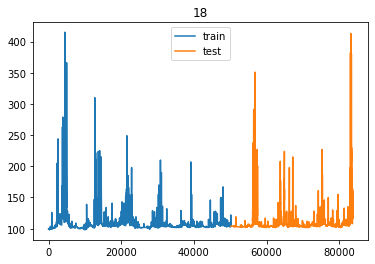

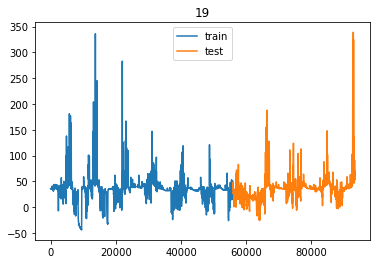

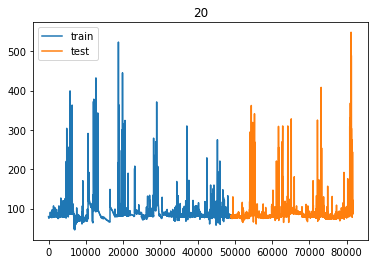

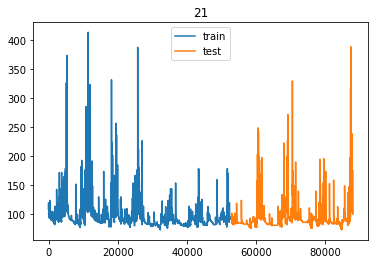

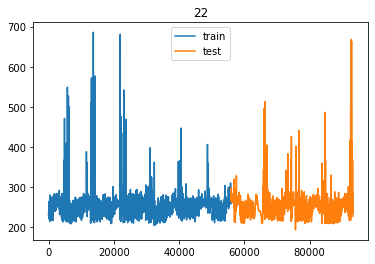

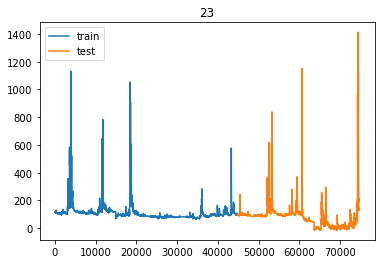

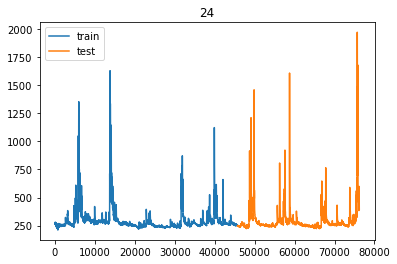

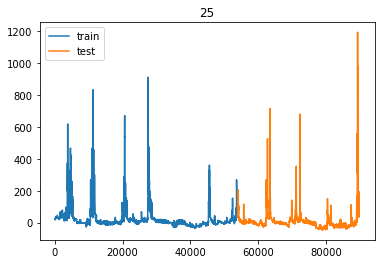

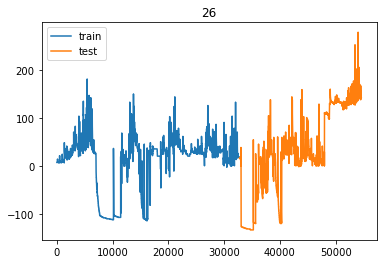

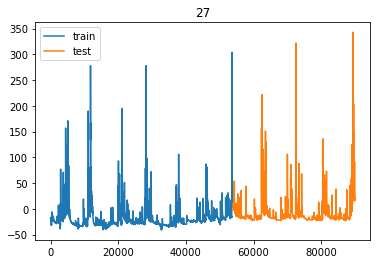

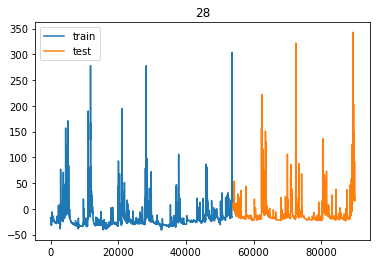

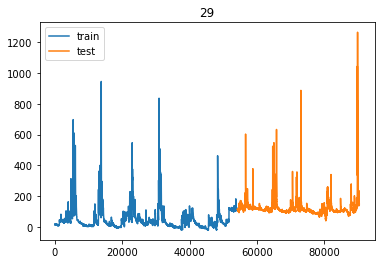

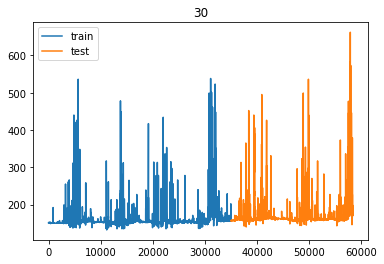

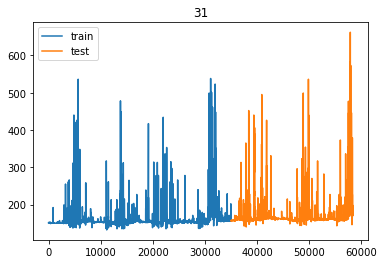

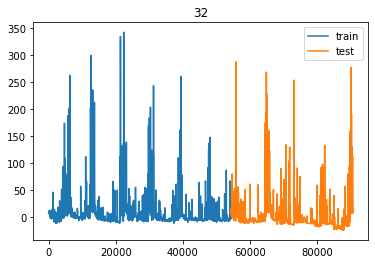

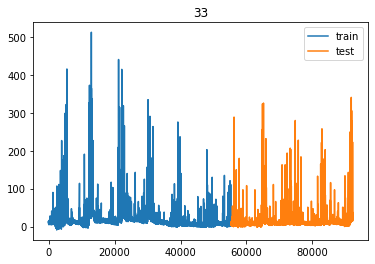

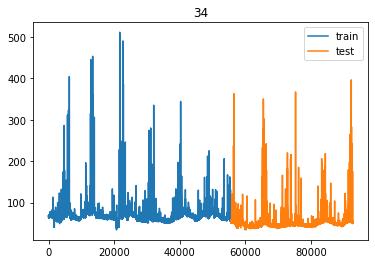

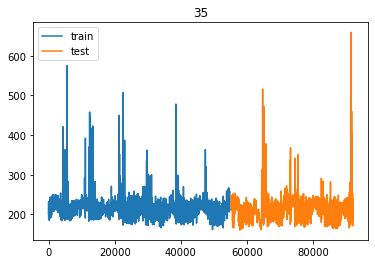

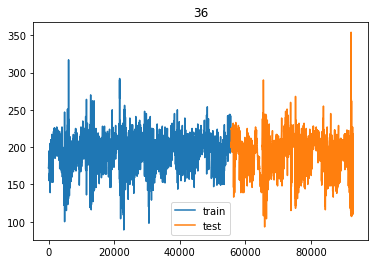

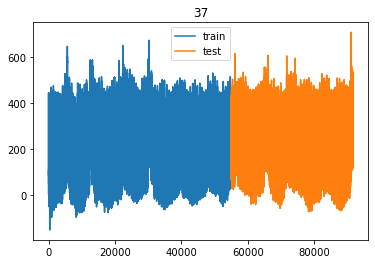

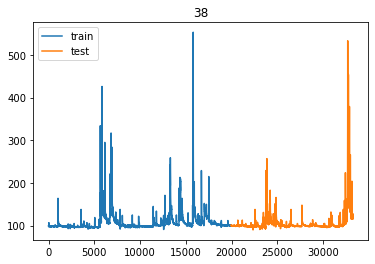

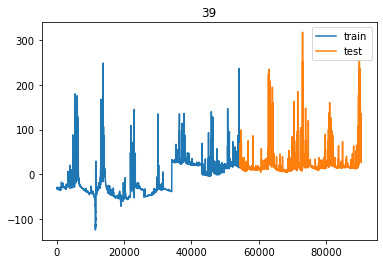

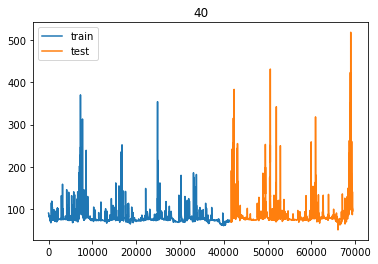

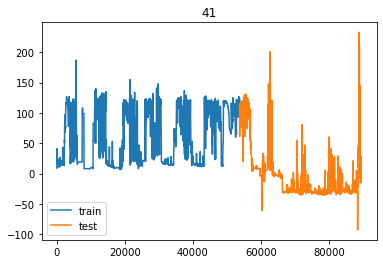

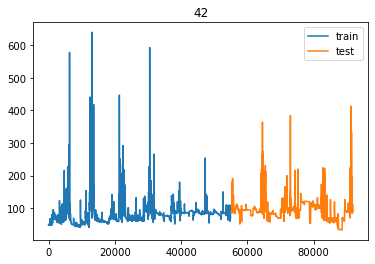

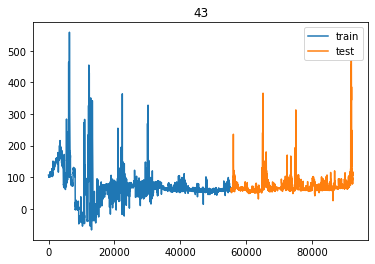

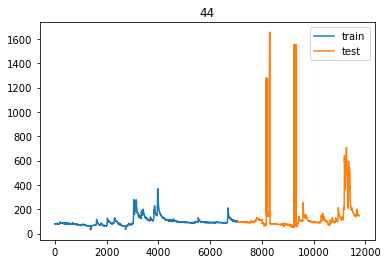

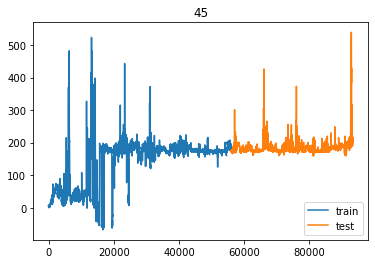

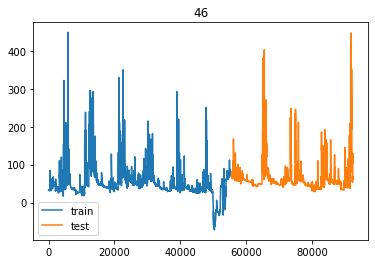

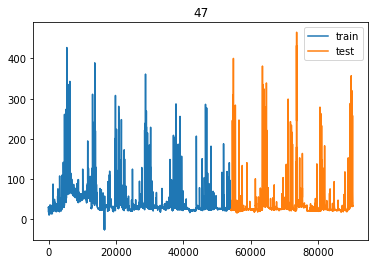

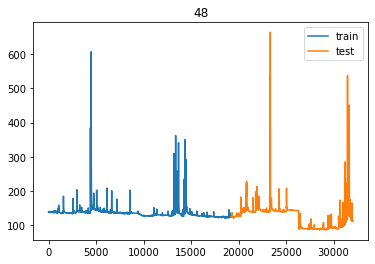

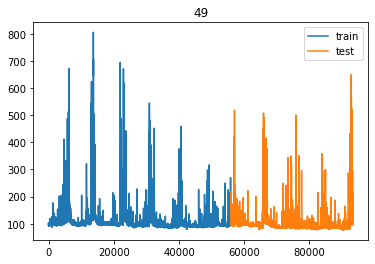

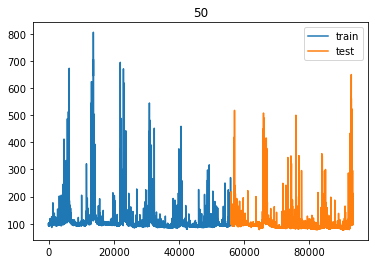

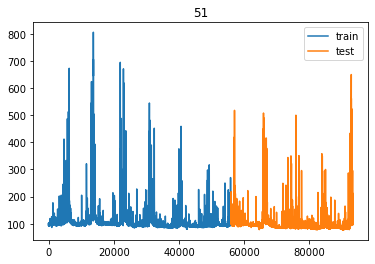

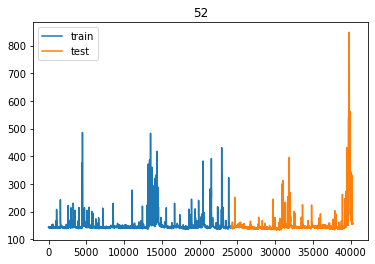

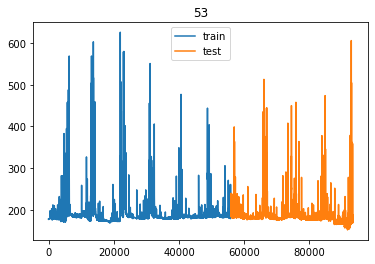

In [94]:
# train, test 데이터 시각화
for i in range(len(df_list)):
    ax = train_list[i].plot()
    test_list[i].plot(ax=ax)
    plt.title(i)
    plt.legend(['train', 'test'])
    plt.show()

In [95]:
for i in range(len(df_list)):
    # time 컬럼을 dataframe index로 설정
    df_list[i] = df_list[i].set_index('time')

In [97]:
df_list[0]

,value
time,
2010-02-25 12:00:00,3.0
2010-02-25 13:00:00,6.0
2010-02-25 14:00:00,10.0
2010-02-25 15:00:00,14.0
2010-02-25 16:00:00,18.0
...,...
2020-08-26 21:00:00,12.0
2020-08-26 22:00:00,12.0
2020-08-26 23:00:00,16.0


In [98]:
train_list_arr = [np.array(train_list[i]).reshape(-1,1) for i in range(len(df_list))]
test_list_arr = [np.array(test_list[i]).reshape(-1,1) for i in range(len(df_list))]

for i in range(len(df_list)):
    print(i, ': ', train_list_arr[i].shape, test_list_arr[i].shape)

0 :  (50693, 1) (33796, 1)
1 :  (50693, 1) (33796, 1)
2 :  (50693, 1) (33796, 1)
3 :  (50693, 1) (33796, 1)
4 :  (19954, 1) (13303, 1)
5 :  (16008, 1) (10673, 1)
6 :  (54303, 1) (36202, 1)
7 :  (52720, 1) (35148, 1)
8 :  (54430, 1) (36287, 1)
9 :  (53174, 1) (35450, 1)
10 :  (49030, 1) (32687, 1)
11 :  (48693, 1) (32463, 1)
12 :  (35025, 1) (23351, 1)
13 :  (19954, 1) (13304, 1)
14 :  (55972, 1) (37315, 1)
15 :  (7059, 1) (4706, 1)
16 :  (35031, 1) (23354, 1)
17 :  (29673, 1) (19783, 1)
18 :  (50232, 1) (33489, 1)
19 :  (55986, 1) (37324, 1)
20 :  (49032, 1) (32688, 1)
21 :  (52753, 1) (35169, 1)
22 :  (55974, 1) (37316, 1)
23 :  (44812, 1) (29875, 1)
24 :  (45723, 1) (30482, 1)
25 :  (53911, 1) (35942, 1)
26 :  (32755, 1) (21838, 1)
27 :  (53963, 1) (35976, 1)
28 :  (53963, 1) (35976, 1)
29 :  (54251, 1) (36168, 1)
30 :  (35026, 1) (23352, 1)
31 :  (35026, 1) (23352, 1)
32 :  (54389, 1) (36260, 1)
33 :  (55354, 1) (36904, 1)
34 :  (55651, 1) (37102, 1)
35 :  (55194, 1) (36797, 1)
36 :

In [99]:
# 데이터 스케일링(Scaling)
# 마지막으로 MinMaxScaler 클래스를 사용하여 데이터를 스케일링
# MinMaxScalar(X)는 데이터의 최대값이 1, 최소값이 0이 되도록 변환
# 데이터의 scale을 맞추면 weight의 scale도 일관성 있게 나올 수 있다.
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler() # 해당 함수는 최소한 데이터의 갯수가 1개는 있어야 수행 가능
#15, 44번 교량은 2019년부터 데이터가 있어 매우 적으므로 train, test 데이터 split 기준에 따라 오류 발생 가능

train_sc = [sc.fit_transform(train_list_arr[i]) for i in range(len(df_list))]
test_sc = [sc.fit_transform(test_list_arr[i]) for i in range(len(df_list))]

train_sc[0]

array([[0.13539192],
       [0.14251781],
       [0.152019  ],
       ...,
       [0.02612827],
       [0.02612827],
       [0.02612827]])

In [100]:
# 정규화가 완료된 데이터들은 다시 pandas dataframe 데이터 타입으로 변환
# dataframe으로 타입을 변경하는 이유는 pandas는 시계열 자료에 대한 다양한 기능을 제공하여 LSTM에서 사용하는 window를 만들기 유용하기 때문
train_sc_df = [pd.DataFrame(train_sc[i], columns=['value'], index=train_list[i].index) for i in range(len(df_list))]
test_sc_df = [pd.DataFrame(test_sc[i], columns=['value'], index=test_list[i].index) for i in range(len(df_list))]
train_sc_df[0].head()

,value
0,0.135392
1,0.142518
2,0.152019
3,0.161520
4,0.171021


In [101]:
# sliding window 구성
# window: LSTM 훈련을 위한 고정된 사이즈 단위
# window 12개로 과거 시간 데이터 12개를 사용해서 다음 시간 단위의 값을 예측
for i in range(len(df_list)):
    for s in range(1, 13):
        train_sc_df[i]['shift_{}'.format(s)] = train_sc_df[i]['value'].shift(s)
        test_sc_df[i]['shift_{}'.format(s)] = test_sc_df[i]['value'].shift(s)

train_sc_df[0].head(13)

,value,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
0,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.171021,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.180523,0.171021,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN,NaN
7,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN,NaN
8,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN,NaN
9,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518,0.135392,NaN,NaN,NaN


In [102]:
# 과거 12개 하천 수위 지수들이 train 속성들이 되고, '현재 하천 수위의 지수'가 y(target)이 된다.
# 데이터에서 결측값 제거
# 전체 데이터를 train 데이터, test 데이터로 분리
# 각각의 train, test 데이터는 속성과 타겟열로 분리
X_train = [train_sc_df[i].dropna().drop('value', axis=1) for i in range(len(df_list))]
y_train = [train_sc_df[i].dropna()[['value']] for i in range(len(df_list))]

X_test = [test_sc_df[i].dropna().drop('value', axis=1) for i in range(len(df_list))]
y_test = [test_sc_df[i].dropna()[['value']] for i in range(len(df_list))]

X_train[0].head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
12,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518,0.135392
13,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019,0.142518
14,0.190024,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520,0.152019
15,0.187648,0.190024,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021,0.161520
16,0.185273,0.187648,0.190024,0.192399,0.194774,0.194774,0.194774,0.192399,0.192399,0.187648,0.180523,0.171021


In [103]:
# dataframe 타입이었던 train, test 데이터들을 values로 dataframe의 numpy 표현형만 가져옴
# sklearn을 비롯해서 기계학습 패키지들은 train, test 데이터로 numpy의 ndarray 타입을 지원
# values를 사용하기 전 X_train은 DataFrame 타입, values를 사용한 후 numpy.ndarray로 변경 확인
print(type(X_train[0]))
X_train_np = [X_train[i].values for i in range(len(df_list))]

print(type(X_train_np[0]))
X_test_np = [X_test[i].values for i in range(len(df_list))]
y_train_np = [y_train[i].values for i in range(len(df_list))]
y_test_np = [y_test[i].values for i in range(len(df_list))]
 
# X_train 데이터는 (데이터 갯수, 12개 slot)
# y_train 데이터는 (데이터 갯수, 1개의 target)
print(X_train_np[0].shape)
print(y_train_np[0].shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(50681, 12)
(50681, 1)


In [104]:
# 최종 훈련 데이터 생성을 위해 keras의 LSTM에 필요한 3차원 데이터로 변환
# 최종 데이터 shape이 (size, timestamp, feature) 형태로 나타나야함.
# 속성이 하천 수위 지수 한가지이므로 1을 입력, n 개의 속성을 사용할 경우 feature 순서에 n의 값을 입력
X_train_t = [X_train_np[i].reshape(X_train_np[i].shape[0], 12, 1) for i in range(len(df_list))]
X_test_t = [X_test_np[i].reshape(X_test_np[i].shape[0], 12, 1) for i in range(len(df_list))]

print("최종 DATA")
print(X_train_t[0].shape)
print(X_train_t[0])
print(y_train[0])

최종 DATA
(50681, 12, 1)
[[[0.19477435]
  [0.19477435]
  [0.19477435]
  ...
  [0.152019  ]
  [0.14251781]
  [0.13539192]]

 [[0.19239905]
  [0.19477435]
  [0.19477435]
  ...
  [0.16152019]
  [0.152019  ]
  [0.14251781]]

 [[0.19002375]
  [0.19239905]
  [0.19477435]
  ...
  [0.17102138]
  [0.16152019]
  [0.152019  ]]

 ...

 [[0.02612827]
  [0.02612827]
  [0.02612827]
  ...
  [0.02612827]
  [0.02612827]
  [0.02612827]]

 [[0.02612827]
  [0.02612827]
  [0.02612827]
  ...
  [0.02612827]
  [0.02612827]
  [0.02612827]]

 [[0.02612827]
  [0.02612827]
  [0.02612827]
  ...
  [0.02612827]
  [0.02612827]
  [0.02612827]]]
          value
12     0.192399
13     0.190024
14     0.187648
15     0.185273
16     0.182898
...         ...
50688  0.026128
50689  0.026128
50690  0.026128
50691  0.026128
50692  0.026128

[50681 rows x 1 columns]


In [105]:
# LSTM 모델의 입력은 기본적으로 3차원 구조(최종 훈련 데이터를 생성하기 위해 3차원 데이터로 변환 필수)
# 첫 번째 차원: 데이터(sample/batch) 갯수, 두번째 차원: 시간축의 차원(time step size),
# 마지막 차원: LSTM 입력층에 입력되는 데이터(feature) 갯수
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# 모델 생성전에 tensorflow의 graph 영역을 clear한다.
K.clear_session()

# Sequeatial Model: 레이어들을 선형으로 쌓는 모델
model = Sequential() 
# LSTM 레이어: 20메모리 셀, (timestep, feature)
model.add(LSTM(20, input_shape=(1, 1))) 
# Dense 레이어: output = 1(예측하고자 하는 target갯수)
model.add(Dense(1)) 
# optimizer: 훈련과정 설정, loss: 최적화 과정에서 최소화될 손실 함수 설정, metrics: 훈련 모니터링위해 사용
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error']) # metrics = ['accuracy']는 classification에 사용
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [106]:
# 과적합 방지: Early stopping 설정
# patience 횟수 만큼 정확도가 개선이 안되면 학습 중단
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

for i in range(len(df_list)):
    # 체크 포인트 만들어서 모델 저장
    # 모델 저장 폴더 설정
    MODEL_DIR = './model/'+str(i)+'/'   #같은 폴더 내에 model이라는 폴더가 없다면 만들어줘라
    if not os.path.exists(MODEL_DIR):      
        os.mkdir(MODEL_DIR)    #mkdir이 폴더 생성 함수

    # 모델 저장 조건 설정
    modelpath = MODEL_DIR+'{epoch:02d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = modelpath, monitor='loss', verbose = 1, save_best_only = True)
    
    hist = model.fit(X_train_t[i], y_train[i], validation_split=0.2, epochs=500,
              batch_size=20, verbose=1, callbacks=[early_stop, checkpointer])
    
    #------------------------------------------------------------------------------------------#
    # loss는 매 에포크 마다의 훈련 손실값
    # acc는 매 에포크 마다의 훈련 정확도
    # val_loss는 매 에포크 마다의 검증 손실값
    # val_acc는 매 에포크 마다의 검증 정확도
    # validation loss가 증가하기 시작한다면, 모델이 과적합이 되고 있다고 판단
    print(hist.history)
    
    #------------------------------------------------------------------------------------------#
    y_vloss = hist.history['val_loss']   # 테스트셋 오차
    #print(len(y_vloss))   # shape함수는 리스트에 적용안됨

    # 학습셋 정확도
    y_mse = hist.history['mean_squared_error']

    # 테스트셋 정확도
    y_val_mse = hist.history['val_mean_squared_error']
    x_len = np.arange(len(y_mse))

    #학습셋 정확도 라인
    plt.plot(x_len, y_mse, 'o', c='blue', markersize=3, label = 'Trainset_mse')

    #테스트셋 오차 라인
    plt.plot(x_len, y_vloss, 'o', c='red', markersize=3, label = 'Testset_loss')

    plt.legend(loc='best')   #location  right, left, upper rigtht 등등 
    plt.grid()   # 격자 
    plt.xlabel('epoch')
    plt.ylabel('score')

    plt.show()

    # 테스트 정확도 출력
    print(' MSE: %.4f' % y_val_mse[-1])  
    #제일 마지막 정확도를 가져오고 싶어서 인덱싱 -1번 
    
    #------------------------------------------------------------------------------------------#
    # 예측 결과 시각화하여 확인
    # 원래 값과 예측 값이 일치하면 직선에 가깝게 분포가 되는데 결과가 나쁘지 않다
    y_pred = model.predict(X_test_t[i], batch_size=30)
    plt.scatter(y_test[i], y_pred)
    plt.xlabel("WL Index: $Y_i$")
    plt.ylabel("Predicted WL Index: $\hat{Y}_i$")
    plt.title("WL vs Predicted WL Index: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    
    #------------------------------------------------------------------------------------------#
    # test 값과 예측 값 시각화
    plt.plot(y_test[i], 'bo-', label='Actual')
    plt.plot(y_pred, 'ro-', label='Predicted')
    plt.legend()
    plt.show()

Epoch 1/500
2023/2028 [============================>.] - ETA: 0s - loss: 4.8440e-04 - mean_squared_error: 4.8440e-04WARNING:tensorflow:Model was constructed with shape (None, 1, 1) for input Tensor("lstm_input:0", shape=(None, 1, 1), dtype=float32), but it was called on an input with incompatible shape (None, 12, 1).

Epoch 00001: loss improved from inf to 0.00048, saving model to ./model/0\01-0.0001.hdf5
2028/2028 [==============================] - 15s 7ms/step - loss: 4.8357e-04 - mean_squared_error: 4.8357e-04 - val_loss: 7.6588e-05 - val_mean_squared_error: 7.6588e-05
Epoch 2/500
2023/2028 [============================>.] - ETA: 0s - loss: 2.3060e-04 - mean_squared_error: 2.3060e-04
Epoch 00002: loss improved from 0.00048 to 0.00023, saving model to ./model/0\02-0.0001.hdf5
2028/2028 [==============================] - 13s 7ms/step - loss: 2.3101e-04 - mean_squared_error: 2.3101e-04 - val_loss: 9.3498e-05 - val_mean_squared_error: 9.3498e-05
Epoch 3/500
2025/2028 [==================

KeyboardInterrupt: 